In [1]:
#you should run this code in path:/data1/wuguojia/data/mhc_benchmark/tools/TransPHLA-AOMP/TransPHLA-AOMP
#./MHCXAI.py is a copy of /home/wuguojia/biocode/mhc_benchmark/MHCXAI.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle, importlib
import argparse
import subprocess
import sys
import lime
import lime.lime_tabular
import shap
%matplotlib inline

/data1/wuguojia/software/miniconda/envs/shaplime/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/data1/wuguojia/software/miniconda/envs/shaplime/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for 

In [2]:
#LIME
command = [
    "python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
    "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
    "--index", "0",
    "--predictor", "transphla",
    "--xai", "LIME",
    "--mode", "None",  # 根据需要设置
    "--trainf_path", "/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.csv",
    "--dest", "/data1/wuguojia/data/mhc_benchmark/attentionbase/result/"
]

result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("LIME done")

LIME done


In [49]:
#SHAP
command = [
    "python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
    "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
    "--index", "0",
    "--predictor", "transphla",
    "--xai", "SHAP",
    "--mode", "None",  # 根据需要设置
    "--trainf_path", "/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.pkl",
    "--dest", "/data1/wuguojia/data/mhc_benchmark/attentionbase/result/"
]

result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("SHAP done")

SHAP done


Text(0.5, 1.0, 'SHAP TransPHLA')

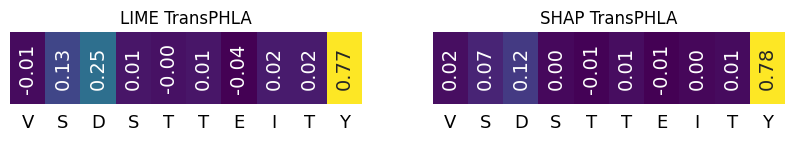

In [3]:
# Plot
#1
fig,ax = plt.subplots(1,2,figsize=(5*2,1.25*0.75))
peptide = 'VSDSTTEITY'
result_path = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result/'
values = np.load(f'{result_path}LIME_VSDSTTEITY_HLA-A*01:01_transphla_None.npy')[1:(1+len(peptide))]
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[0])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("LIME TransPHLA")
#2
values = np.load(f'{result_path}SHAP_VSDSTTEITY_HLA-A*01:01_transphla_None.npy')
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[1])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("SHAP TransPHLA")